In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [5]:
tokenizer = Tokenizer()
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O /tmp/sonnets.txt
data = open('../../data/sonnets.txt', 'r', encoding='utf8').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

In [8]:
print(label.shape)
print(label[0:10])

(15462,)
[417 877 166 213 517 878 134 351 102 156]


In [ ]:
label = ku.to_categorical(label, num_classes=total_words)

In [3]:
total_words, max_sequence_len

(3211, 11)

In [4]:
label.shape

(15462, 3211)

In [ ]:
#model = Sequential()
#model.add(# Your Embedding Layer)
#model.add(# An LSTM Layer)
#model.add(# A dropout layer)
#model.add(# Another LSTM Layer)
#model.add(# A Dense Layer including regularizers)
#model.add(# A Dense Layer)
# Pick an optimizer
#model.compile(# Pick a loss function and an optimizer)
#print(model.summary())

In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [11]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 12ms/step - loss: 7.3172 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4692 - accuracy: 0.0233
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3940 - accuracy: 0.0240
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.2644 - accuracy: 0.0281
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1534 - accuracy: 0.0356
Epoch 6/100
484/484 [==============================] - 6s 11ms/step - loss: 6.0890 - accuracy: 0.0371
Epoch 7/100
484/484 [==============================] - 6s 11ms/step - loss: 6.0133 - accuracy: 0.0395
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9219 - accuracy: 0.0454
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8304 - accuracy: 0.0474
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 5.72

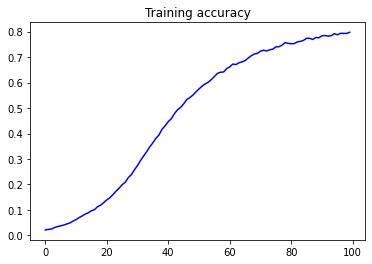

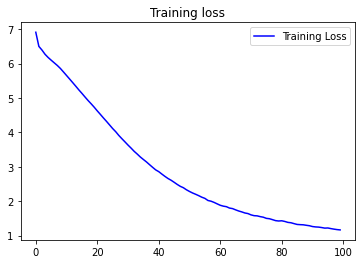

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [22]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    break
    
print(seed_text)

[591, 18, 5, 352, 393]
Help me Obi Wan Kenobi, you're my only hope of
